In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image = cv2.imread("Nature.jpg")
if image is None:
    raise ValueError("Image not found! Please check the path.")

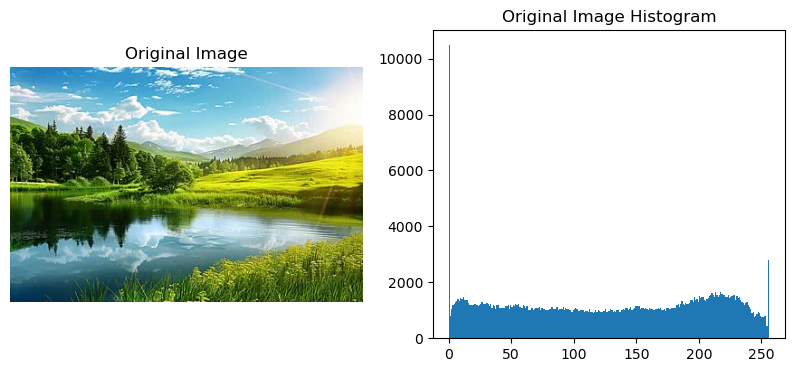

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.title('Original Image Histogram')
plt.show()

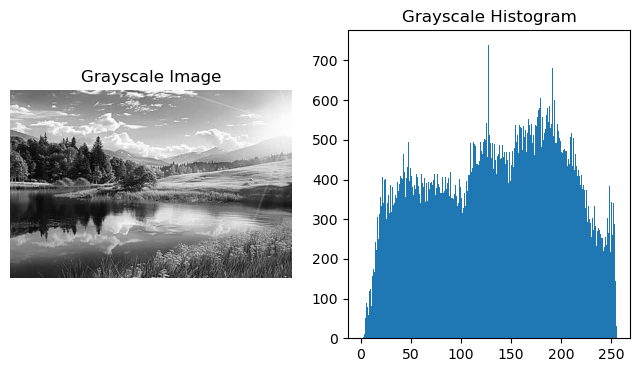

In [ ]:
# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.title('Grayscale Histogram')
plt.show()

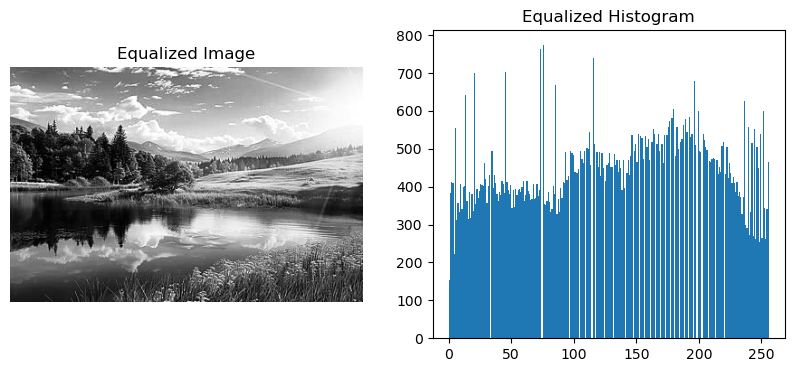

In [ ]:
# Histogram Equalization
image_eq = cv2.equalizeHist(gray)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image_eq, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.hist(image_eq.ravel(), bins=256, range=[0,256])
plt.title('Equalized Histogram')
plt.show()

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter, median_filter, convolve
import matplotlib.pyplot as plt

In [ ]:
# Spatial domain filters
# Gaussian blur
blurred = gaussian_filter(gray, sigma=2)

# Median filter
median = median_filter(gray, size=3)

# Sharpen filter kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = convolve(gray, sharpen_kernel)


In [ ]:
# Frequency domain filters
f = np.fft.fft2(gray)
f_shift = np.fft.fftshift(f)
rows, cols = gray.shape
crow, ccol = rows//2, cols//2

# Low-pass mask
low_pass_mask = np.zeros_like(gray)
low_pass_mask[crow-30:crow+30, ccol-30:ccol+30] = 1
low_pass_result = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift * low_pass_mask)))

# High-pass mask
high_pass_mask = np.ones_like(gray)
high_pass_mask[crow-10:crow+10, ccol-10:ccol+10] = 0
high_pass_result = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift * high_pass_mask)))


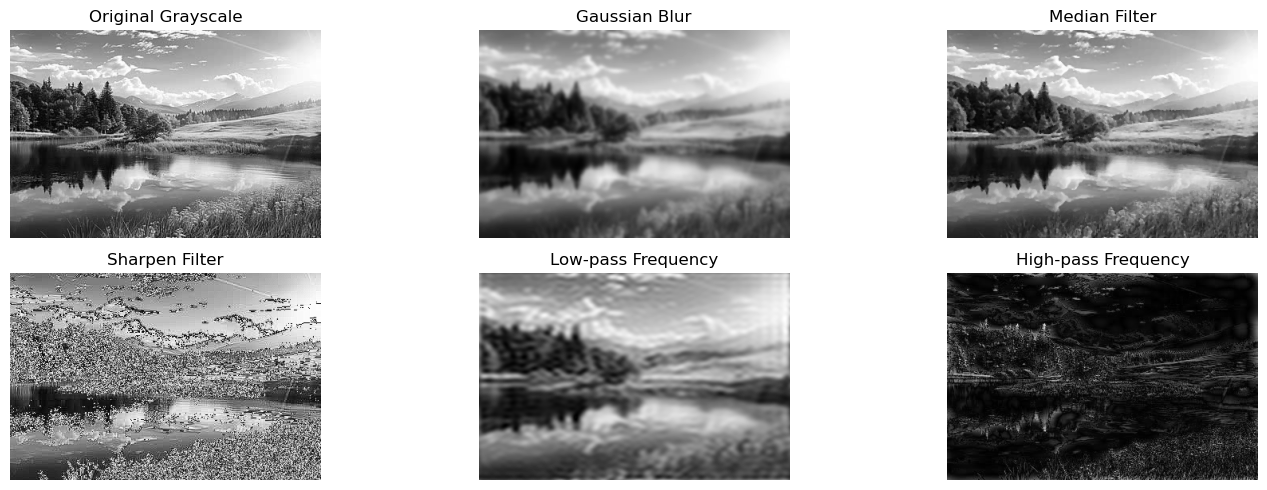

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter, convolve

# Read and convert to grayscale
image = cv2.imread("Nature.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ================== Spatial Domain Filters ==================
gaussian_blur = gaussian_filter(gray, sigma=2)         # Gaussian Blur
median_blur   = median_filter(gray, size=3)            # Median Filter
sharpened     = convolve(gray, [[0,-1,0],[-1,5,-1],[0,-1,0]])  # Sharpen Filter

# ================== Frequency Domain Filters ==================
f_shift = np.fft.fftshift(np.fft.fft2(gray))  # FFT shift
rows, cols = gray.shape
crow, ccol = rows//2, cols//2

low_pass  = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift * 
                   np.pad(np.ones((60,60)), ((crow-30, rows-crow-30), (ccol-30, cols-ccol-30)), 'constant'))))

high_pass = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift * 
                   (1 - np.pad(np.ones((20,20)), ((crow-10, rows-crow-10), (ccol-10, cols-ccol-10)), 'constant')))))

# ================== Display Results ==================
plt.figure(figsize=(15,5))
plt.subplot(2,3,2); plt.imshow(gaussian_blur, cmap='gray'); plt.title("Gaussian Blur"); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(median_blur, cmap='gray'); plt.title("Median Filter"); plt.axis('off')
plt.subplot(2,3,4); plt.imshow(sharpened, cmap='gray'); plt.title("Sharpen Filter"); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(low_pass, cmap='gray'); plt.title("Low-pass Filter (FFT)"); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(high_pass, cmap='gray'); plt.title("High-pass Filter (FFT)"); plt.axis('off')
plt.tight_layout(); plt.show()
